# **Explore Weather Trends**
### by **Mário damhur**

## **Overview**

In this project, I will analyze local and global temperature data and compare the temperature trends where I live to overall global temperature trends.

## **Dataset**

The dataset was extracted from the udacity database with SQL commands.

```
SELECT *
FROM global_data;

SELECT year, avg_temp
FROM city_data
WHERE city = 'Manaus';
```

The generated files were saved in the directory `data/`. Contains two files with two features each:
- **global_temp_avg.csv**: Trend of global average temperature in each year
    - year
    - avg_temp
- **manaus_temp_avg**: Trend of average temperature of my city (Manaus - Brazil) in each year
    - year
    - avg_temp

# **Imports**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Set some parameters of matplotlib
plt.rcParams["figure.figsize"] = (14,8)
SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# **Assess**

## **Visual Assessment**

In [2]:
global_df = pd.read_csv('data/global_temp_avg.csv')
manaus_df = pd.read_csv('data/manaus_temp_avg.csv')

In [3]:
global_df

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


In [4]:
manaus_df

,year,avg_temp
0,1824,26.44
1,1825,26.45
2,1826,26.36
3,1827,26.70
4,1828,26.10
...,...,...
185,2009,27.39
186,2010,27.56
187,2011,27.29
188,2012,27.34


## **Programmatic assessment**

In [5]:
global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [6]:
global_df.duplicated().sum()

0

In [7]:
manaus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      190 non-null    int64  
 1   avg_temp  175 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 3.1 KB


In [8]:
manaus_df[manaus_df.avg_temp.isnull()]

,year,avg_temp
6,1830,NaN
7,1831,NaN
8,1832,NaN
9,1833,NaN
10,1834,NaN
11,1835,NaN
12,1836,NaN
13,1837,NaN
14,1838,NaN
15,1839,NaN


In [9]:
manaus_df.duplicated().sum()

0

#### **Quality**
- NaN values in avg_temp column in manaus_df
- Rename columns names in both dataset

## **Clean**

In [10]:
manaus_df_clean = manaus_df.copy()
global_df_clean = global_df.copy()

- **`manaus_df`: NaN values in avg_temp column**

**Define**

Remove the rows lower than the value 1844

In [11]:
manaus_df_clean = manaus_df_clean[manaus_df_clean.year > 1844]
manaus_df_clean = manaus_df_clean.reset_index(drop=True)

**Test**

In [12]:
print('New shape:', manaus_df_clean.shape)
manaus_df_clean.isnull().sum()

New shape: (169, 2)


year        0
avg_temp    0
dtype: int64

- **Rename columns name in both dataset**

**Define**

Rename the columns with pandas method

In [13]:
manaus_df_clean.rename(columns={'avg_temp': 'manaus_avg_temp'}, inplace=True)
global_df_clean.rename(columns={'avg_temp': 'global_avg_temp'}, inplace=True)

**Test**

In [14]:
print(global_df_clean.info())
print('*'*50)
print(manaus_df_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             266 non-null    int64  
 1   global_avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB
None
**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             169 non-null    int64  
 1   manaus_avg_temp  169 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.8 KB
None


# **Combining and Saving the Datasets in One Master Dataframe**

In [15]:
combined_df = pd.merge(global_df_clean, manaus_df_clean, how='inner', on=['year'])

combined_df

,year,global_avg_temp,manaus_avg_temp
0,1845,7.85,25.83
1,1846,8.55,26.52
2,1847,8.09,25.90
3,1848,7.98,25.95
4,1849,7.98,25.94
...,...,...,...
164,2009,9.51,27.39
165,2010,9.70,27.56
166,2011,9.52,27.29
167,2012,9.51,27.34


In [16]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             169 non-null    int64  
 1   global_avg_temp  169 non-null    float64
 2   manaus_avg_temp  169 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 5.3 KB


In [17]:
combined_df.to_csv('data/global_manaus_temp_avg.csv', index=False)

# Analysis

In [18]:
master_df = pd.read_csv('data/global_manaus_temp_avg.csv')
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             169 non-null    int64  
 1   global_avg_temp  169 non-null    float64
 2   manaus_avg_temp  169 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.1 KB


In [20]:
global_mv_avg = master_df['global_avg_temp'].rolling(10).mean()
manaus_mv_avg = master_df['manaus_avg_temp'].rolling(10).mean()

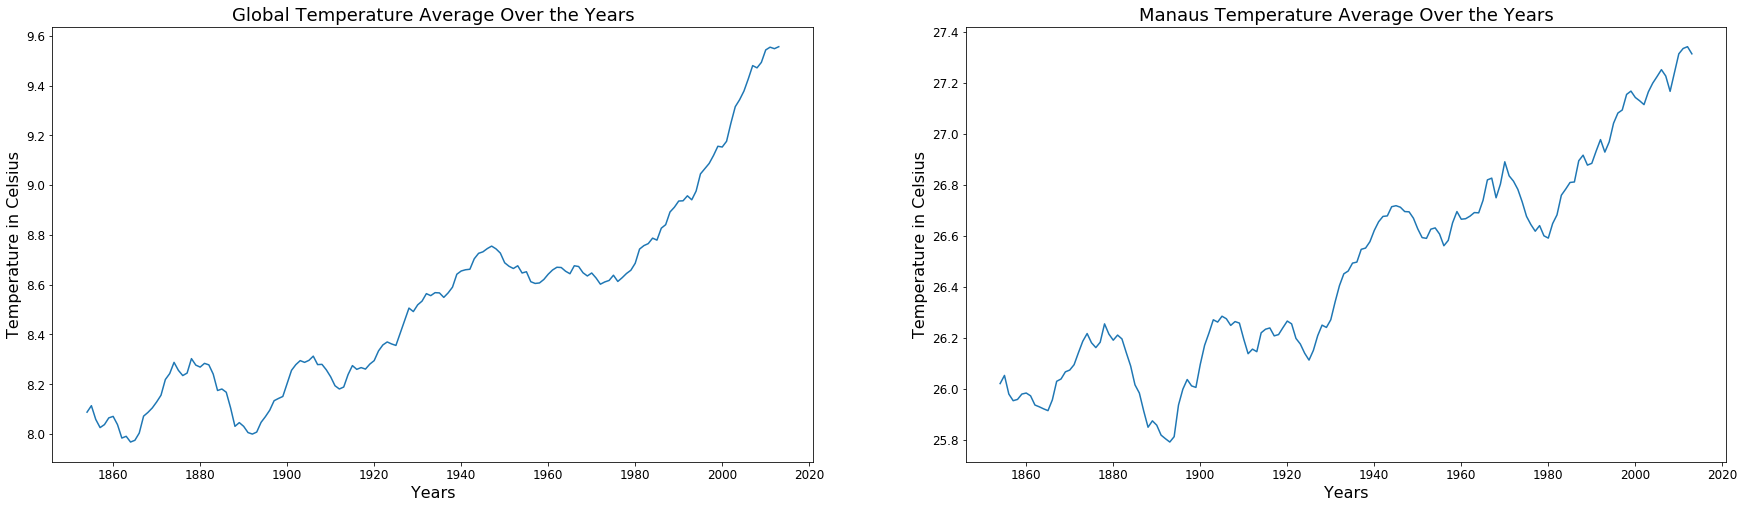

In [27]:
plt.figure(figsize=(30, 8))

plt.subplot(1,2,1)
plt.plot(master_df['year'], global_mv_avg)
plt.xlabel('Years')
plt.ylabel('Temperature in Celsius')
plt.title('Global Temperature Average Over the Years')

plt.subplot(1,2,2)
plt.plot(master_df['year'], manaus_mv_avg)
plt.xlabel('Years')
plt.ylabel('Temperature in Celsius')
plt.title('Manaus Temperature Average Over the Years');

- We can observe that in both scenarios we have a trend: temperature is increased over the years

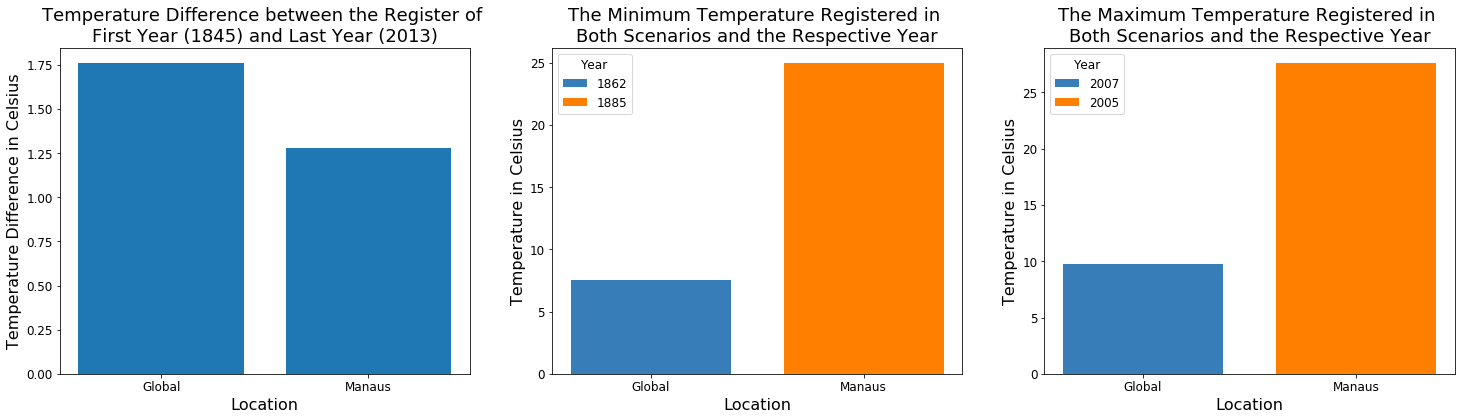

In [31]:
year_min_global = str(int(master_df.loc[master_df['global_avg_temp'].idxmin()]['year']))
year_min_manaus = str(int(master_df.loc[master_df['manaus_avg_temp'].idxmin()]['year']))

year_max_global = str(int(master_df.loc[master_df['global_avg_temp'].idxmax()]['year']))
year_max_manaus = str(int(master_df.loc[master_df['manaus_avg_temp'].idxmax()]['year']))

global_diff = master_df.global_avg_temp.iloc[-1] - master_df.global_avg_temp.iloc[0]
manaus_diff = master_df.manaus_avg_temp.iloc[-1] - master_df.manaus_avg_temp.iloc[0]

plt.figure(figsize=(25, 6))
bar_width = 0.75

plt.subplot(1,3,1)
plt.bar(['Global', 'Manaus'], [global_diff, manaus_diff])
plt.ylabel('Temperature Difference in Celsius')
plt.xlabel('Location')
plt.title('Temperature Difference between the Register of \nFirst Year (1845) and Last Year (2013)')

plt.subplot(1,3,2)
plt.bar('Global', master_df.global_avg_temp.min(),bar_width,color='#377eb8')
plt.bar('Manaus', master_df.manaus_avg_temp.min(),bar_width,color='#ff7f00')
plt.legend([year_min_global, year_min_manaus], title='Year', loc=2)
plt.ylabel('Temperature in Celsius')
plt.xlabel('Location')
plt.title('The Minimum Temperature Registered in \nBoth Scenarios and the Respective Year')

plt.subplot(1,3,3)
plt.bar('Global', master_df.global_avg_temp.max(),bar_width,color='#377eb8')
plt.bar('Manaus', master_df.manaus_avg_temp.max(),bar_width,color='#ff7f00')
plt.legend([year_max_global, year_max_manaus], title='Year', loc=2)
plt.ylabel('Temperature in Celsius')
plt.xlabel('Location')
plt.title('The Maximum Temperature Registered in \nBoth Scenarios and the Respective Year');



- The difference between the first year and last year registered on our dataset show us that global increase more than Manaus city.
- The Year of the minimum and maximum Global temperature registered is different from the Year of minimum and maximum Manaus temperature registered. This is curious and this happened maybe because Manaus is a very hot city and the concentrated industry here maybe cause this difference.

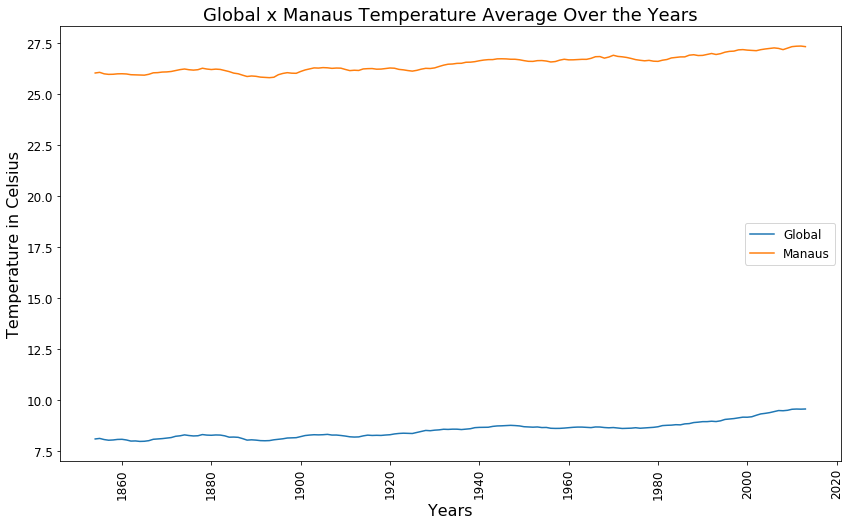

In [28]:
plt.plot(master_df['year'], global_mv_avg, label='Global')
plt.plot(master_df['year'], manaus_mv_avg, label='Manaus')
plt.legend(loc=5)
plt.xticks(rotation=90)
plt.xlabel('Years')
plt.ylabel('Temperature in Celsius')
plt.title('Global x Manaus Temperature Average Over the Years');

- The difference between the Global location with the local (Manaus) location is pretty higher. About 16 °C.
- Even with this difference, it is possible to notice the trend. The Global temperatura it is getting hotter, consequently, Manaus city too. This is very insane because Manaus city is already a really hot city.